In [143]:
import numpy as np
import math # for factorials and a better sqrt function
import matplotlib.pyplot as plt
from scipy.special import eval_hermite as herm # evaluates n'th order hermite polynomials 
from matplotlib.animation import FuncAnimation


In [144]:
# use atomic units so that m = e = hbar = 1

k = 20 # force constant of the well 
omega = np.sqrt(k) # m = 1

nmax = 1000 # number of x values
num = 50 # number of eigenfunctions

x1 = -7.5
x2 = 7.5
step = (x2-x1) / nmax # step in x values

# Gaussian pulse
shift = 2
sigma = (x2 - x1) / 180 # standard deviation (width) of gaussian
mu = -x1 + shift # expected position (centres gaussian at x = shift )

# introduce the dimensionless variable xi in place of x
def xi(x):
    return np.sqrt(omega) * x 

In [145]:
# ideal shape of wavepacket (a gaussian)
def gaussian(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)
    

In [146]:
# two arrays, g_squared (regular gaussian, the probability distribution) and g (wavefunction)
g_squared = np.empty(nmax)

for x in np.arange(0, nmax, 1):
    g_squared[x] = gaussian(x * step , mu, sigma)

g = np.sqrt(g_squared)

In [147]:
# n'th eigenfunction of the harmonic oscillator
def psi(n, x):
    An = (omega / np.pi)**(1/4) * (1. / (math.sqrt(math.factorial(n)) * math.sqrt(2**n)))
    return An * herm(n, xi(x)) * np.exp(-0.5 * (xi(x)**2)) # removed factor of An here 

In [148]:
# a n-dimensional array of n eigenfunctions 
eigs = np.empty((num, nmax))

for n in range(0, num): 
    for x in np.arange(0, nmax, 1):
        eigs[n, x] = psi(n, x  * step + x1) # plus x1 to centre eignefunction 

In [149]:
# plotting the n eigenfunctions
xs = np.linspace(x1, x2, nmax)

for n in range(0, num):
    plt.plot(xs, eigs[n])

In [150]:
# calculating the weighting of each eigenfunction
cn = np.zeros(num)

for n in range(0, num):
    cn[n] = step * sum(g * eigs[n])
    
plt.plot(cn)

In [151]:
# finding the wavefunction from a linear sum of the n eigenfunctions, and plotting to check the shape matches our
# original gaussian (at t = 0)
psi_0 = 0
for n in range(0, num):
    psi_0 = (psi_0 + cn[n] * eigs[n])
    
plt.plot(psi_0, '-r')
plt.plot(g, '-g')

In [152]:
def animate(t):
    """
    this function gets called by animation (imported from matplotlib)
    each time called, it will replot with a different values for t
    
    Parameters:
        t : float
            used as a counter to display different frames of the animation 
    
    """
    # calculating the energy eigenvalues for each eigenfunction
    energy = np.zeros(num)

    for n in range(0, num):
        energy[n] = (n + 1/2) 
    
    # create our wavefunction object
    obj = 0
    for n in range(0, num):
        obj = obj + cn[n] * eigs[n] * np.exp(-1j * energy[n] * t) 
        
    real.set_ydata(obj.real)
    imag.set_ydata(obj.imag)
    mag.set_ydata(np.sqrt(obj.real**2 + obj.imag**2))
    
    # create prob. dist. object
    _prob = obj.real**2 + obj.imag**2
    prob.set_ydata(_prob)
    
    # adjust the wave plot height in a loop, in case wave height changes (it doesnt, but useful to know in principle)
    #ymax1 = 1.2 * abs(obj.flat[abs(obj).argmax()])
    #ymax2 = 1.2 * abs(_prob.flat[abs(_prob).argmax()])
    #ax1.set_ylim(-ymax1, ymax1)
    #ax2.set_y.im(0, ymax2)

<IPython.core.display.Javascript object>


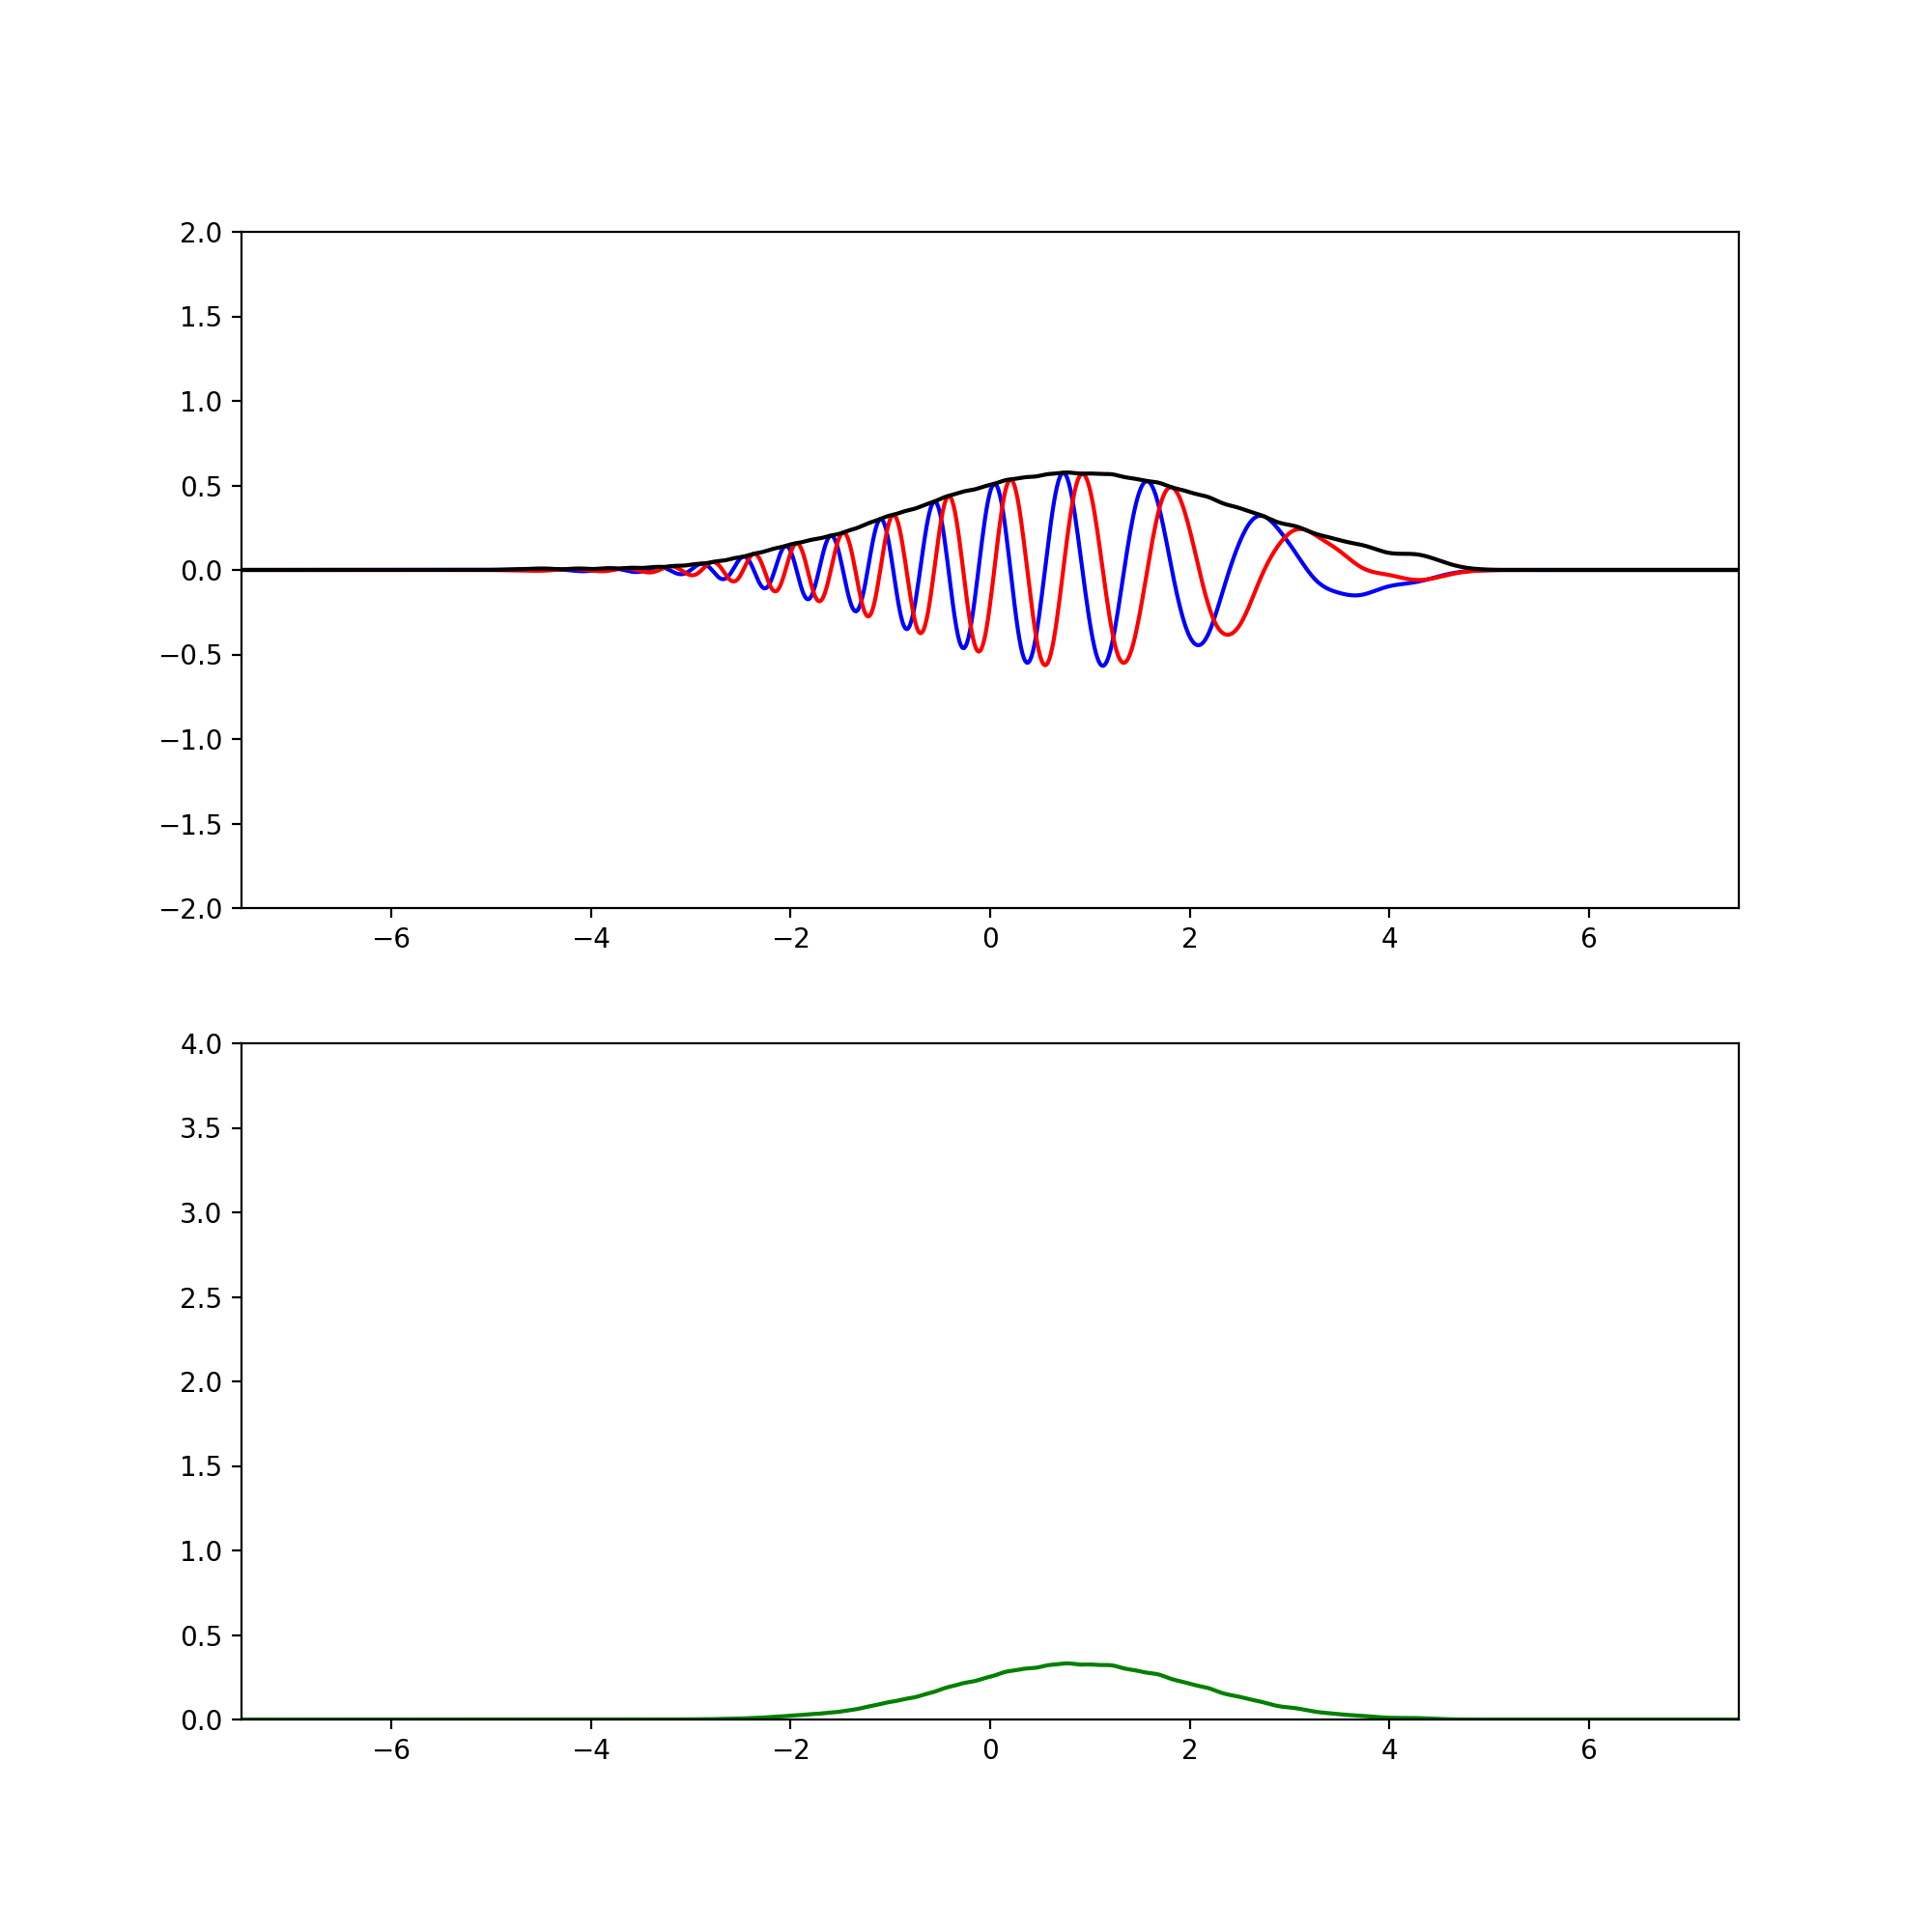

In [153]:
%matplotlib notebook


fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

# creating our line objects for the plots (initialise the plots)
real, = ax1.plot(xs, eigs[1], '-b') 
imag, = ax1.plot(xs, eigs[1], '-r') 
mag, = ax1.plot(xs, eigs[1], '-k')
prob, = ax2.plot(xs, eigs[1], '-g')


def init():
    """
    initialize the figure object 
    
    Returns:
        wave_real : a line object that will form the first frame of the plot
        
        wave_imag : see above
        
        prob : see above
        
        wave_mag : see above
    
    """
    
    ax1.set_xlim(x1, x2)
    ax1.set_ylim(-2, 2)
    ax2.set_xlim(x1, x2)
    ax2.set_ylim(0, 4)
    
    return real, imag, mag, prob

# the FuncAnimation function iterates through our animate function using the ts array
dt = 0.005 # stepsize of the widths 
ts = np.arange(0, 2000, dt)
ani = FuncAnimation(fig, animate, ts, init_func=init, interval=1, blit=True) 
    # animation object, give it the figure object, the animate function, the input for the animate function,
    # the intialising function, interval - amount of time between each frame, blitting reduces time

plt.show()